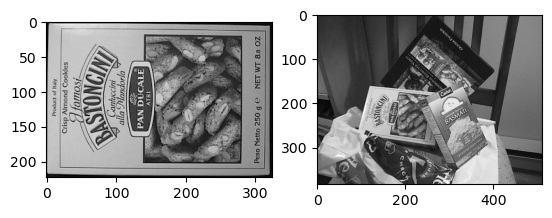

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1= cv2.imread('../imgs/basmat0.png')
img2= cv2.imread('../imgs/basmat.png')

plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)

In [2]:
sift= cv2.SIFT_create()
kp1, des1= sift.detectAndCompute(img1, None)
kp2, des2= sift.detectAndCompute(img2, None)

des2.shape

(969, 128)

In [3]:
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
mach=bf.match(des1, des2)

In [4]:
mach[0].imgIdx

0

In [5]:
mach[0].trainIdx

336

In [6]:
mach[0].distance

1123.0

In [7]:
matches = sorted(mach, key = lambda x:x.distance)
matches[:10]

[< cv2.DMatch 0000027C98C49DD0>,
 < cv2.DMatch 0000027C98C492F0>,
 < cv2.DMatch 0000027C98C49E70>,
 < cv2.DMatch 0000027C98C49C70>,
 < cv2.DMatch 0000027C98C49A50>,
 < cv2.DMatch 0000027C98C498F0>,
 < cv2.DMatch 0000027C98C49F90>,
 < cv2.DMatch 0000027C98C49930>,
 < cv2.DMatch 0000027C98C49810>,
 < cv2.DMatch 0000027C98C496B0>]

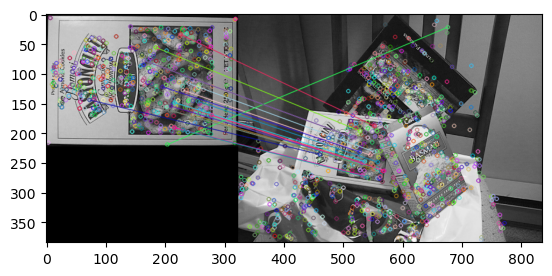

In [8]:
img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:20], None)
plt.imshow(img3)

### Full Example 1

(104, 128)


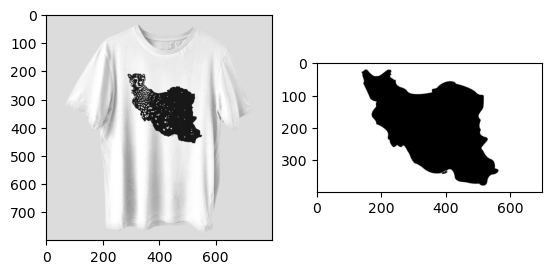

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1= cv2.imread('../imgs/tshirt1.jpg')
img2= cv2.imread('../imgs/map.jpg')

plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)

sift= cv2.SIFT_create()
kp1, des1= sift.detectAndCompute(img1, None)
kp2, des2= sift.detectAndCompute(img2, None)

print(des2.shape)

bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
mach=bf.match(des1, des2)

matches = sorted(mach, key = lambda x:x.distance)


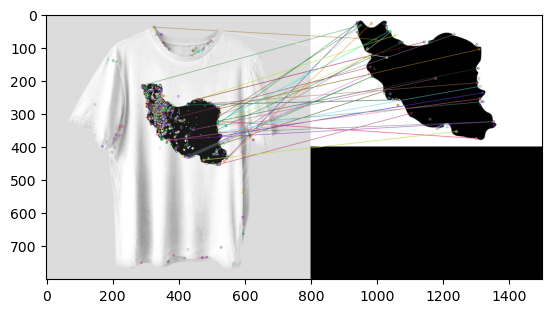

In [14]:
img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:60], None)
plt.imshow(img3)

### Full Example 2

Text(0.5, 1.0, 'out')

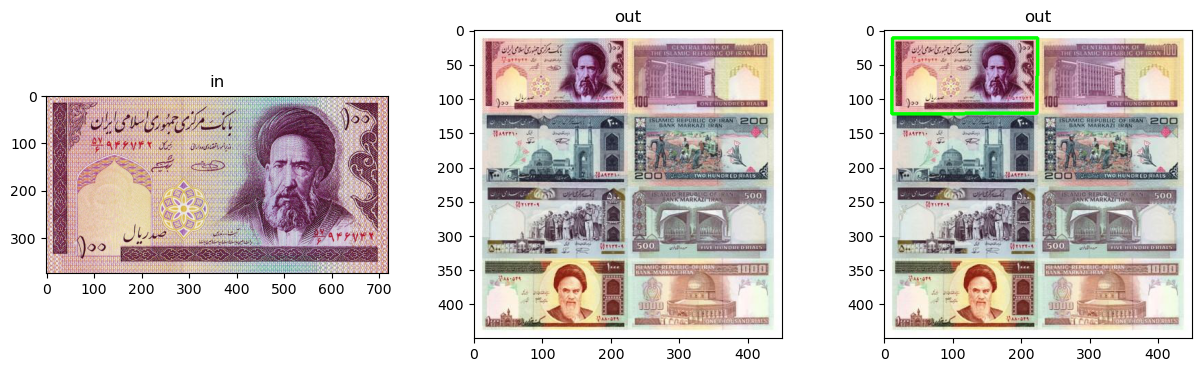

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img0= cv2.imread('../imgs/eskenas.jpg')
img= cv2.imread('../imgs/esk.jpg')
img1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
res=img0.copy()
sift=cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)
index=dict(algorithm=1,trees=5)
search=dict(checks=50)
flan=cv2.FlannBasedMatcher(index,search)
mact=flan.knnMatch(des1,des2,k=2)

good=[]
for m,n in mact:
    if m.distance<0.7* n.distance:
        good.append(m)
min_ma=10
if len(good)>min_ma:
    scr=np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst=np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M,mask=cv2.findHomography(scr,dst,cv2.RANSAC,5.0)
    mactma=mask.ravel().tolist()
    h,w=img1.shape
    pts=np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
    dst=cv2.perspectiveTransform(pts,M)
    res=cv2.polylines(res,[np.int32(dst)],True,(0,255,0),3)
else:
    print('nis')
    mactma=None
plt.figure(figsize=[15,4])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title('in')
plt.subplot(132);plt.imshow(img0[...,::-1]);plt.title('out')
plt.subplot(133);plt.imshow(res[...,::-1]);plt.title('out')

### Full Example 3

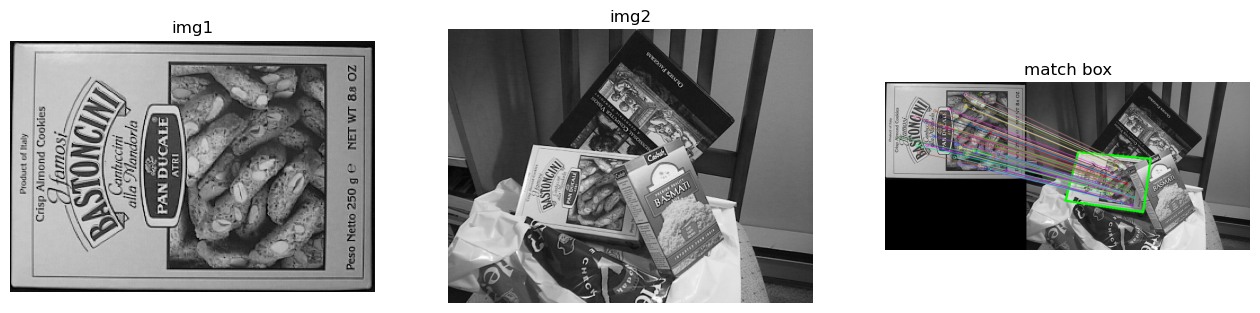

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('../imgs/basmat0.png')
img2 = cv2.imread('../imgs/basmat.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img_c = img2.copy()

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)



flan = cv2.FlannBasedMatcher()

mach = flan.knnMatch(des1, des2, k=2)

good = []
for m, n in mach:
    if m.distance < 0.7 * n.distance:
        good.append(m)

if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)  

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    mask = mask.ravel().tolist()

    h, w = gray1.shape
    pts1 = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]]).reshape(-1, 1, 2)

    dst_poly = cv2.perspectiveTransform(pts1, M)
    img2_box = cv2.polylines(img_c, [np.int32(dst_poly)], True, (0, 255, 0), 3)

    out = cv2.drawMatches(img1, kp1, img2_box, kp2, good, None,matchesMask=mask,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    print('nist')


plt.figure(figsize=(16, 6))
plt.subplot(131); plt.imshow(img1[..., ::-1]); plt.title("img1"); plt.axis("off")
plt.subplot(132); plt.imshow(img2[..., ::-1]); plt.title("img2"); plt.axis("off")
plt.subplot(133); plt.imshow(out[..., ::-1]);  plt.title("match box"); plt.axis("off")
plt.show()


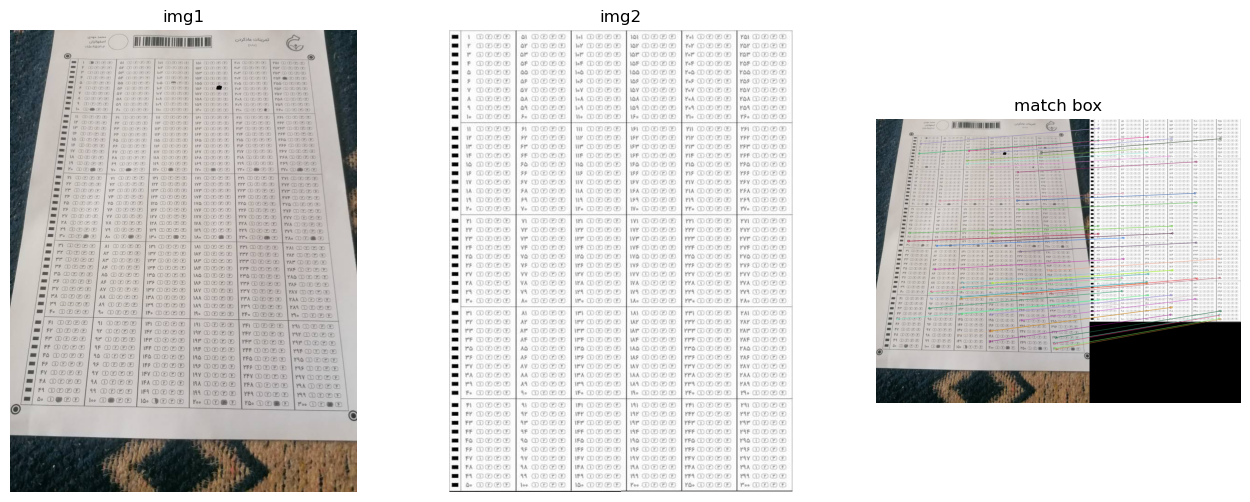

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('../imgs/ans01.jpg')
img2 = cv2.imread('../imgs/ans02.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img_c = img2.copy()

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)



flan = cv2.FlannBasedMatcher()

mach = flan.knnMatch(des1, des2, k=2)

good = []
for m, n in mach:
    if m.distance < 0.7 * n.distance:
        good.append(m)

if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)  

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    mask = mask.ravel().tolist()

    h, w = gray1.shape
    pts1 = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]]).reshape(-1, 1, 2)

    dst_poly = cv2.perspectiveTransform(pts1, M)
    img2_box = cv2.polylines(img_c, [np.int32(dst_poly)], True, (0, 255, 0), 3)

    out = cv2.drawMatches(img1, kp1, img2_box, kp2, good, None,matchesMask=mask,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
   
else:
    print('nist')


plt.figure(figsize=(16, 6))
plt.subplot(131); plt.imshow(img1[..., ::-1]); plt.title("img1"); plt.axis("off")
plt.subplot(132); plt.imshow(img2[..., ::-1]); plt.title("img2"); plt.axis("off")
plt.subplot(133); plt.imshow(out[..., ::-1]);  plt.title("match box"); plt.axis("off")
plt.show()

In [19]:
dst_poly

array([[[-1.5080890e+02, -8.3888359e+01]],

       [[ 6.4614276e+02, -8.3859756e+01]],

       [[ 5.3039337e+02,  8.2708496e+02]],

       [[-6.6829592e-01,  8.3833936e+02]]], dtype=float32)

In [20]:
res

array([[[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 255, 254],
        [253, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 255, 255],
        [253, 255, 255],
        [253, 255, 255],
        ...,
        [252, 255, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [21]:
dst_poly

array([[[-1.5080890e+02, -8.3888359e+01]],

       [[ 6.4614276e+02, -8.3859756e+01]],

       [[ 5.3039337e+02,  8.2708496e+02]],

       [[-6.6829592e-01,  8.3833936e+02]]], dtype=float32)

In [22]:
np.int32(dst_poly)

array([[[-150,  -83]],

       [[ 646,  -83]],

       [[ 530,  827]],

       [[   0,  838]]], dtype=int32)